LINEAR REGRESSION

In [2]:
import seaborn as sns
ir=sns.load_dataset('iris')
ir

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


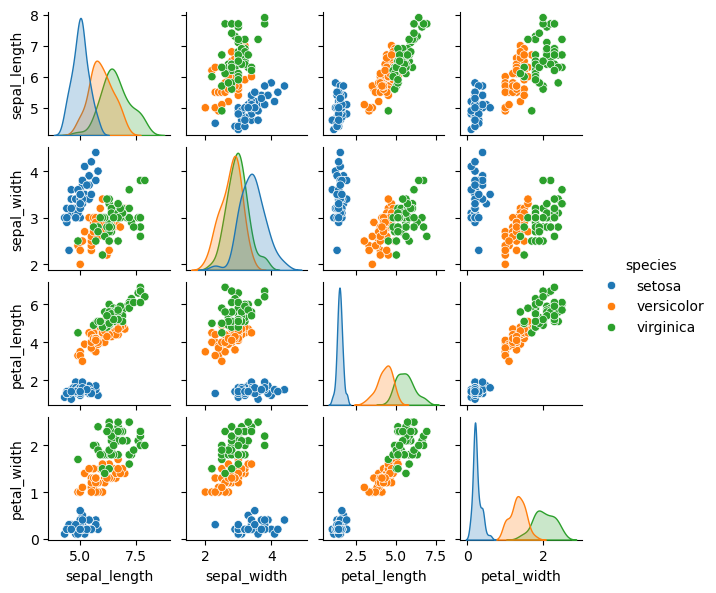

In [3]:
import matplotlib.pyplot as plt
sns.pairplot(ir, hue='species', height=1.5)
plt.show()

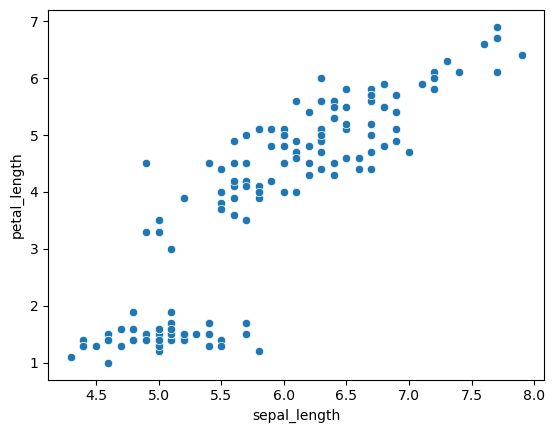

In [4]:
import matplotlib.pyplot as plt
sns.scatterplot(data=ir,x='sepal_length',y='petal_length')
plt.show()

In [5]:
dt,target=ir[['sepal_length']],ir['petal_length']
def sizes( s_slope, m_length,sp):
    y = s_slope*sp + m_length
    return y 

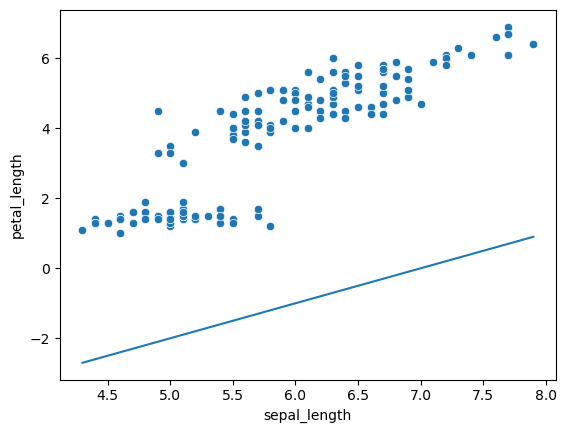

In [6]:
import numpy as np
s_slope=1
m_length=-7
sp=np.linspace(dt.min(),dt.max(),100)
p_length=sizes(s_slope, m_length,sp)
sns.scatterplot(data=ir,x='sepal_length',y='petal_length')
plt.plot(sp,p_length)
plt.show()


In [7]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(dt,target)

LinearRegression()

In [8]:
model.coef_

array([1.85843298])

In [9]:
model.intercept_

-7.101443369602455

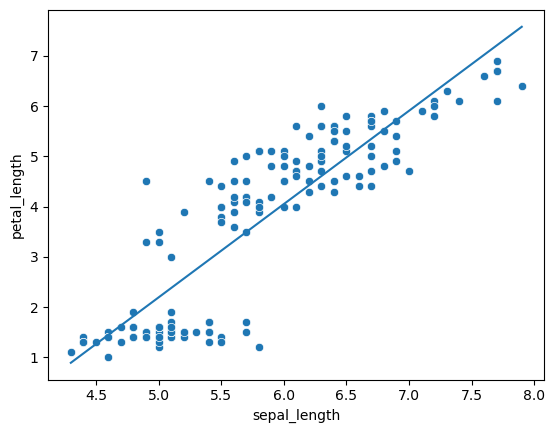

In [10]:
import numpy as np
s_slope=1.85843298
m_length=-7.101443369602455
sp=np.linspace(dt.min(),dt.max(),100)
p_length=sizes(s_slope, m_length,sp)
sns.scatterplot(data=ir,x='sepal_length',y='petal_length')
plt.plot(sp,p_length)
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error
pd=model.predict(dt)
sqerr=mean_squared_error(target, pd)
sqerr

0.7430610341321241

In [12]:
from sklearn.metrics import mean_absolute_error
aberr = mean_absolute_error(target, pd)
aberr

0.7067088106229915

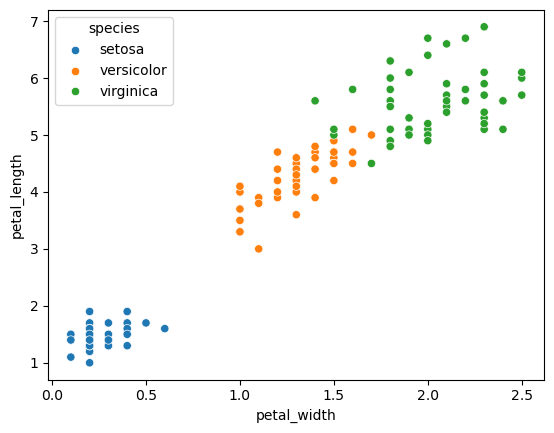

In [13]:
sns.scatterplot(data=ir, x='petal_width', y='petal_length',hue='species')
plt.show()

LOGISTIC REGRESSION

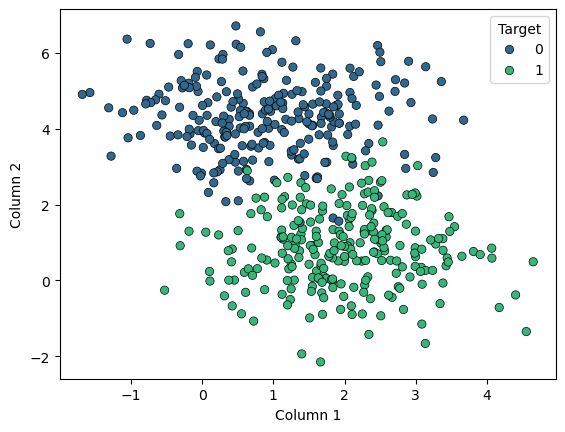

In [15]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
X,y=make_blobs(n_samples=500, centers=2,n_features=2, random_state=0)
dt = pd.DataFrame(X, columns=["Column 1", "Column 2"])
dt["Target"] = y
sns.scatterplot(data=dt, x='Column 1', y='Column 2', palette='viridis', edgecolor='k', hue='Target')
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [17]:
X_test,y_test=make_blobs(n_samples=500000, centers=2,n_features=2, random_state=2)

In [18]:
model.predict(X_test)
model.score(X_test,y_test)

0.499874

In [19]:
model.score(X,y)

0.964

REGULARIZATION

In [21]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.002)
ls.fit(X,y)
ls.score(X,y)

0.765342376163953

In [22]:
ls.predict(X_test)

array([2.5427779 , 0.71194735, 2.6046153 , ..., 3.10040988, 1.47674123,
       1.18065639])

In [23]:
ls.score(X_test,y_test)

-14.767175043157891

In [24]:
from sklearn.linear_model import Ridge
rd=Ridge(alpha=0.002)
rd.fit(X,y)
rd.score(X,y)

0.7653557886225398

In [25]:
rd.predict(X_test)

array([2.53966249, 0.71039584, 2.60254384, ..., 3.09830055, 1.47567617,
       1.17954492])

In [26]:
rd.score(X_test,y_test)

-14.741560942487151

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
x_test_scaled = scaler.transform(X_test)

In [28]:
ls=Lasso(alpha=0.02)
ls.fit(X_train_scaled,y)
ls.score(X_train_scaled,y)

0.7631042400044743

In [29]:
ls.predict(x_test_scaled)

array([2.50139207, 0.71521665, 2.55496774, ..., 3.0362949 , 1.45433862,
       1.16731863])

In [30]:
ls.score(x_test_scaled,y_test)

-14.146864643667916

FEATURE SCALING

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({'Income': [15000, 1800, 120000, 10000],'Age': [25, 18, 42, 51],'Department': ['HR','Legal','Marketing','Management']})
df

,Income,Age,Department
0,15000,25,HR
1,1800,18,Legal
2,120000,42,Marketing
3,10000,51,Management


In [33]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
df[['Income','Age']]=mms.fit_transform(df[['Income','Age']])
df

,Income,Age,Department
0,0.111675,0.212121,HR
1,0.000000,0.000000,Legal
2,1.000000,0.727273,Marketing
3,0.069374,1.000000,Management


In [34]:
from sklearn.preprocessing import Normalizer
nm=Normalizer(norm='l2')    # l2 is default
df[['Income','Age']]=nm.fit_transform(df[['Income','Age']])
df

,Income,Age,Department
0,0.465852,0.884863,HR
1,0.000000,0.000000,Legal
2,0.808736,0.588172,Marketing
3,0.069208,0.997602,Management


In [35]:
from sklearn.preprocessing import FunctionTransformer
ft=FunctionTransformer(np.log2,validate =True)    # l2 is default
df[['Income','Age']]=ft.fit_transform(df[['Income','Age']])
df

C:\Anaconda\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:379: RuntimeWarning: divide by zero encountered in log2
  return func(X, **(kw_args if kw_args else {}))


,Income,Age,Department
0,-1.102056,-0.176475,HR
1,-inf,-inf,Legal
2,-0.306259,-0.765691,Marketing
3,-3.852926,-0.003463,Management


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

enc=OrdinalEncoder()
data=pd.read_csv("D:state-population.csv")
data

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0
...,...,...,...,...
2539,USA,total,2010,309326295.0
2540,USA,under18,2011,73902222.0
2541,USA,total,2011,311582564.0
2542,USA,under18,2012,73708179.0


In [37]:
data['region_code']=enc.fit_transform(data[['state/region']])
data.tail()

,state/region,ages,year,population,region_code
2539,USA,total,2010,309326295.0,45.0
2540,USA,under18,2011,73902222.0,45.0
2541,USA,total,2011,311582564.0,45.0
2542,USA,under18,2012,73708179.0,45.0
2543,USA,total,2012,313873685.0,45.0


In [38]:
from sklearn.preprocessing import OneHotEncoder

hotenc = OneHotEncoder(sparse_output=False)
result=hotenc.fit_transform(data[['ages']])

pd.DataFrame(result, columns=hotenc.get_feature_names_out()).head(15)
data=data.join(pd.DataFrame(result, columns=hotenc.get_feature_names_out()))

In [39]:
data.head(10)

,state/region,ages,year,population,region_code,ages_total,ages_under18
0,AL,under18,2012,1117489.0,1.0,0.0,1.0
1,AL,total,2012,4817528.0,1.0,1.0,0.0
2,AL,under18,2010,1130966.0,1.0,0.0,1.0
3,AL,total,2010,4785570.0,1.0,1.0,0.0
4,AL,under18,2011,1125763.0,1.0,0.0,1.0
5,AL,total,2011,4801627.0,1.0,1.0,0.0
6,AL,total,2009,4757938.0,1.0,1.0,0.0
7,AL,under18,2009,1134192.0,1.0,0.0,1.0
8,AL,under18,2013,1111481.0,1.0,0.0,1.0
9,AL,total,2013,4833722.0,1.0,1.0,0.0


In [40]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Example: True labels and predicted labels
y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
y_pred = np.array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[4 1]
 [1 4]]


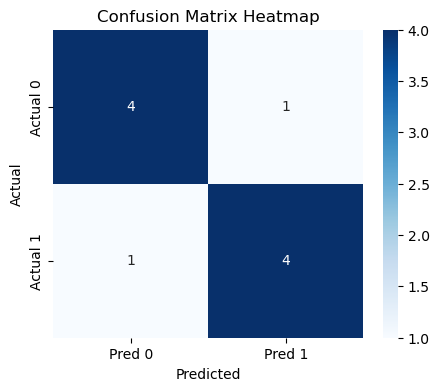

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

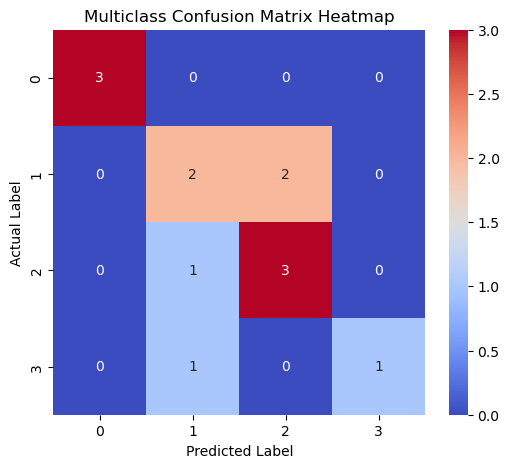

In [42]:
import numpy as np

# Multiclass Example
y_true = [0, 1, 2, 2, 0, 1, 2, 0, 1, 1,2,3,3]
y_pred = [0, 2, 2, 2, 0, 1, 1, 0, 1, 2,2,3,1]

# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
labels = np.unique(y_true)  # Automatically get unique class labels

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Multiclass Confusion Matrix Heatmap")
plt.show()


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, log_loss, roc_auc_score

# True Labels and Predicted Labels
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]
y_prob = [0.9, 0.2, 0.8, 0.4, 0.1, 0.9, 0.6, 0.3, 0.85, 0.2]  # Probability predictions (for Log Loss & ROC-AUC)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Accuracy
print("Accuracy:", accuracy_score(y_true, y_pred))

# Precision, Recall, and F1-score
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))

# Log Loss
print("Log Loss:", log_loss(y_true, y_prob))

# ROC-AUC Score
print("ROC-AUC Score:", roc_auc_score(y_true, y_prob))

# Full Classification Report
print("\nClassification Report:\n", classification_report(y_true, y_pred))


Confusion Matrix:
 [[4 1]
 [1 4]]
Accuracy: 0.8
Precision: 0.8
Recall: 0.8
F1 Score: 0.8
Log Loss: 0.3337287538100926
ROC-AUC Score: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



In [44]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load Iris dataset
data = load_iris()
X, y = data.data, data.target  # Features and target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Gaussian Naïve Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on test set
y_pred = gnb.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9777777777777777

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



SVM

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

dt=pd.read_csv("D:state-population.csv").head(500)
ht=OneHotEncoder(sparse_output=False)
od=OrdinalEncoder()
dt['year_code']=od.fit_transform(dt[['year']])
dt['state_code']=od.fit_transform(dt[['state/region']])
result=ht.fit_transform(dt[['ages']])
dt=dt.join(pd.DataFrame(result, columns=['total','under18']))
dt.fillna(dt['population'].median,inplace=True)

In [47]:
dt.head()

,state/region,ages,year,population,year_code,state_code,total,under18
0,AL,under18,2012,1117489.0,22.0,1.0,0.0,1.0
1,AL,total,2012,4817528.0,22.0,1.0,1.0,0.0
2,AL,under18,2010,1130966.0,20.0,1.0,0.0,1.0
3,AL,total,2010,4785570.0,20.0,1.0,1.0,0.0
4,AL,under18,2011,1125763.0,21.0,1.0,0.0,1.0


In [48]:
X=dt[['state_code','population','year_code']]
y=dt['under18']
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=10)

In [49]:
model=SVC(kernel='poly', degree=3, C=10)
model.fit(x_train,y_train)

SVC(C=10, kernel='poly')

In [50]:
model.predict(x_test)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.])

In [51]:
model.score(x_train,y_train)

0.6171428571428571

In [52]:
model.score(x_test,y_test)

0.5466666666666666

In [53]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [54]:
lr.predict(x_test)

array([0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.])

In [55]:
lr.score(x_train,y_train)

0.7371428571428571

In [56]:
lr.score(x_test,y_test)

0.7333333333333333

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [58]:
rf.predict(x_test)

array([0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.])

In [59]:
rf.score(x_train,y_train)

1.0

In [60]:
rf.score(x_test,y_test)

0.98

CROSS VALIDATE

In [62]:
from sklearn.model_selection import KFold, cross_val_score
kf=KFold(n_splits=6, shuffle=True, random_state=50)
score_svc=cross_val_score(model, X,y, cv=kf, scoring='accuracy')
np.mean(score_svc)

0.5839787722317843

In [63]:
from sklearn.model_selection import KFold, cross_val_score
kf=KFold(n_splits=6, shuffle=True, random_state=50)
score_svc=cross_val_score(lr, X,y, cv=kf, scoring='accuracy')
np.mean(score_svc)

C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.773881239242685

In [64]:
from sklearn.model_selection import KFold, cross_val_score
kf=KFold(n_splits=6, shuffle=True, random_state=50)
score_svc=cross_val_score(rf, X,y, cv=kf, scoring='accuracy')
np.mean(score_svc)

0.9739672977624784

TUNE HYPERPARAMETERS

In [66]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
param={
    'kernel':['poly','rbf','sigmoid'],
    'degree':[2,3,4],
    'C':[1,10,15]
}
svm=SVC()
gs=GridSearchCV(svm, param,cv=6, scoring='accuracy')
gs.fit(X,y)
gs.best_params_

{'C': 1, 'degree': 2, 'kernel': 'rbf'}

In [67]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013455,0.001263,0.005138,0.000464,1,2,poly,"{'C': 1, 'degree': 2, 'kernel': 'poly'}",0.500000,0.500000,0.566265,0.506024,0.493976,0.518072,0.514056,0.024511,18
1,0.015810,0.001187,0.008516,0.000951,1,2,rbf,"{'C': 1, 'degree': 2, 'kernel': 'rbf'}",0.785714,0.928571,0.614458,1.000000,0.518072,0.084337,0.655192,0.304686,1
2,0.013550,0.001599,0.004954,0.000104,1,2,sigmoid,"{'C': 1, 'degree': 2, 'kernel': 'sigmoid'}",0.535714,0.642857,0.638554,0.602410,0.518072,0.084337,0.503657,0.193387,25
3,0.011703,0.002728,0.004660,0.000754,1,3,poly,"{'C': 1, 'degree': 3, 'kernel': 'poly'}",0.500000,0.500000,0.566265,0.506024,0.493976,0.493976,0.510040,0.025479,19
4,0.015799,0.000850,0.008198,0.000772,1,3,rbf,"{'C': 1, 'degree': 3, 'kernel': 'rbf'}",0.785714,0.928571,0.614458,1.000000,0.518072,0.084337,0.655192,0.304686,1
5,0.012616,0.000418,0.004543,0.000467,1,3,sigmoid,"{'C': 1, 'degree': 3, 'kernel': 'sigmoid'}",0.535714,0.642857,0.638554,0.602410,0.518072,0.084337,0.503657,0.193387,25
6,0.016661,0.004731,0.005186,0.000365,1,4,poly,"{'C': 1, 'degree': 4, 'kernel': 'poly'}",0.500000,0.500000,0.542169,0.506024,0.493976,0.493976,0.506024,0.016680,23
7,0.017232,0.002277,0.008909,0.000823,1,4,rbf,"{'C': 1, 'degree': 4, 'kernel': 'rbf'}",0.785714,0.928571,0.614458,1.000000,0.518072,0.084337,0.655192,0.304686,1
8,0.012424,0.000658,0.005734,0.001874,1,4,sigmoid,"{'C': 1, 'degree': 4, 'kernel': 'sigmoid'}",0.535714,0.642857,0.638554,0.602410,0.518072,0.084337,0.503657,0.193387,25
9,0.013360,0.001364,0.005483,0.000484,10,2,poly,"{'C': 10, 'degree': 2, 'kernel': 'poly'}",0.500000,0.500000,0.602410,0.506024,0.493976,0.903614,0.584337,0.147642,11


In [68]:
gs.best_score_

0.6551921973608721

TREE

In [70]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(random_state=50)
tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=50)

In [71]:
tree.score(x_train,y_train)

1.0

In [72]:
tree.predict(x_test)

array([0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.])

In [73]:
tree.score(x_test,y_test)

1.0

In [74]:
params={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    "max_depth":list(range(1, 10)),
    'min_samples_split':[2, 3, 4],
    "min_samples_leaf":list(range(1, 10))
}
tree_cv=GridSearchCV(
    tree,
    params,
    scoring='f1',
    cv=5
)
tree_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=50),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='f1')

In [75]:
tree_cv.score(x_train,y_train)

1.0

In [76]:
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [77]:
tree_cv.predict(x_test)

array([0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.])

In [78]:
tree_cv.score(x_test,y_test)

1.0

In [79]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)

1.0

In [80]:
rfc.predict(x_test)

array([0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.])

In [81]:
rfc.score(x_test,y_test)

1.0

In [82]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

rfc_cv=GridSearchCV(rfc,params,scoring='accuracy',cv=5)
rfc_cv.fit(x_train,y_train)
rfc_cv.score(x_train,y_train)

1.0

In [83]:
rfc_cv.predict(x_test)

array([0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.])

In [84]:
rfc_cv.score(x_test,y_test)

1.0

In [85]:
rfc_cv.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 200}